# Iris Classification

This example is an extension of [classifier_basics](/anfis-toolbox/examples/classifier_basic/).  
Here we use the **Iris dataset**, a classic benchmark in machine learning composed of 150 samples from three flower species (*Setosa*, *Versicolor*, and *Virginica*).

The dataset is loaded directly from **`sklearn.datasets`**, serving here to demonstrate the **interoperability between scikit-learn and the ANFIS Toolbox**.  
While this example uses `scikit-learn` only as a convenient data source, it is important to note that **the ANFIS Toolbox itself does not depend on scikit-learn**.

## 1. Load dataset

The dataset contains 150 samples from three flower species — *Setosa*, *Versicolor*, and *Virginica*.  
Each sample is described by four continuous features that capture the flower’s morphology: **sepal length**, **sepal width**, **petal length**, and **petal width**.

First, we’ll load the dataset and visualize the class distribution using three of these features to get an intuitive 3D view of how the samples are separated in feature space.


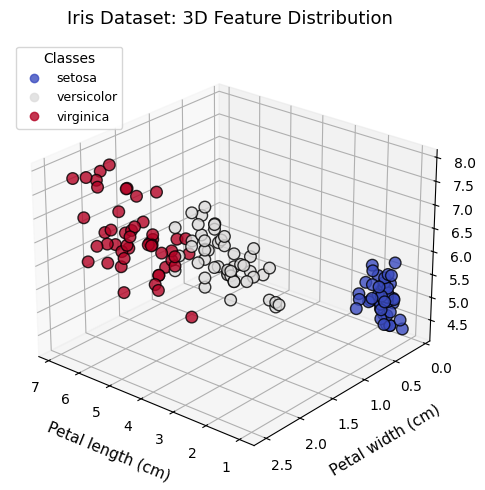

In [27]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Select 3 features for visualization (Petal length, Petal width, Sepal length)
x_idx, y_idx, z_idx = 2, 3, 0  # indices for the features

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(
    X[:, x_idx],
    X[:, y_idx],
    X[:, z_idx],
    c=y,
    cmap="coolwarm",
    edgecolor="k",
    alpha=0.8,
    s=70,
)

ax.set_title("Iris Dataset: 3D Feature Distribution", pad=12, fontsize=13)
ax.set_xlabel(feature_names[x_idx].capitalize(), fontsize=11, labelpad=8)
ax.set_ylabel(feature_names[y_idx].capitalize(), fontsize=11, labelpad=8)
ax.set_zlabel(feature_names[z_idx].capitalize(), fontsize=11, labelpad=8)

# Legend
handles, _ = scatter.legend_elements()
ax.legend(handles, target_names, title="Classes", fontsize=9, title_fontsize=10, loc="upper left")

# Light grid and camera angle
ax.grid(True, linestyle="--", alpha=0.3)
ax.view_init(elev=25, azim=130)

plt.tight_layout()
plt.show()


## 2. Prepare data

Before training the model, we split the dataset into **training** and **testing** subsets to evaluate generalization performance.  
We’ll use the standard 70/30 ratio, ensuring each class remains proportionally represented in both subsets.

In [29]:
# We'll name the features as X and y the target labels
X, y = iris.data, iris.target

In [30]:
# Randomly shuffle and split the dataset into training (70%) and testing (30%) sets
np.random.seed(42)
train_ratio = 0.7
idx = np.random.permutation(len(X))
split = int(train_ratio * len(X))
X_train, X_test = X[idx[:split]], X[idx[split:]]
y_train, y_test = y[idx[:split]], y[idx[split:]]

## 3. Configure the ANFIS Classifier

In this step, we use the standard configuration of the [ANFISClassifier](/anfis-toolbox/api/classifier/).

Here, we only adjust a few parameters to better fit the Iris dataset:

- `n_classes=3` — specifies the number of output classes corresponding to the three flower species;  
- `batch_size=64` — defines the number of samples processed per training step;  
- `random_state=42` — ensures reproducibility of the results.

All other hyperparameters remain at their default values, including the initialization strategy for membership functions and the optimizer.


In [59]:
from anfis_toolbox import ANFISClassifier

clf = ANFISClassifier(
    n_classes=3,
    batch_size=64,
    random_state=42
)

## 4. Training the Model

We now train the classifier using the training subset and evaluate its performance on the test set.  
The `fit` method performs the complete training loop — including membership function updates and consequent parameter optimization — while `evaluate` computes standard classification metrics such as accuracy, precision, and recall.

The model achieved an **overall accuracy of 93.3%**, with balanced performance across all classes as indicated by a **balanced accuracy of 92.9%** and macro-averaged F1-score of **0.94**.  
The confusion matrix shows that most samples were correctly classified, with only a few misclassifications between *Versicolor* and *Virginica*, which is expected given their similar feature distributions.


In [62]:
clf.fit(X_train, y_train)
metrics = clf.evaluate(X_test, y_test)

ANFISClassifier evaluation:
  accuracy: 0.933333
  balanced_accuracy: 0.929630
  precision_macro: 0.945304
  recall_macro: 0.929630
  f1_macro: 0.937402
  precision_micro: 0.933333
  recall_micro: 0.933333
  f1_micro: 0.933333
  confusion_matrix:
    [[ 9  0  1]
     [ 0 17  0]
     [ 0  2 16]]
  classes: [0 1 2]


## 5. Results Visualization

The confusion matrix can be obtained directly from the `metrics` dictionary returned by the `evaluate()` method.  
It summarizes the correct and incorrect predictions for each class, helping identify which flower species are most frequently confused and complementing the numerical metrics reported above.

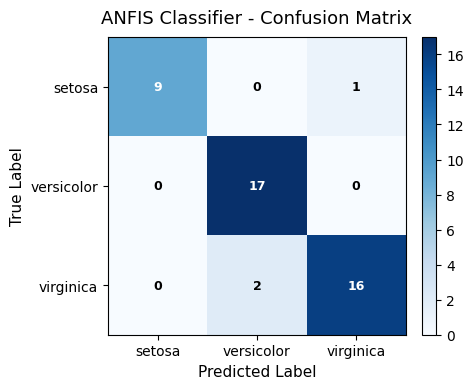

In [76]:
# Retrieve confusion matrix and class names
cm = metrics["confusion_matrix"]
class_names = iris.target_names

fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)

# Title and labels
ax.set_title("ANFIS Classifier - Confusion Matrix", fontsize=13, pad=10)
ax.set_xlabel("Predicted Label", fontsize=11)
ax.set_ylabel("True Label", fontsize=11)
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

# Annotate each cell with count
for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax.text(
            j, i, f"{cm[i, j]}",
            ha="center", va="center",
            color="black" if cm[i, j] < cm.max() / 2 else "white",
            fontsize=9, weight="bold"
        )

# Aesthetic adjustments
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.grid(False)
plt.tight_layout()
plt.show()
